In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

# Pandas library is used for importing various file types e.g. csv, excel, json.
# also used for manipulation and cleaning dataframes.

# Numpy library has functions used for working with arrays and matrices
# faster, clearer and better quality code using Numpy

# Statsmodels is a module that provides classes and functions for the estimation of statistical models
# as well as for conducting statistical tests and statistical data exploration

# Matplotlib is a 2D plotting library for visualising data in Python

# Seaborn is used for improving Matplotlib visualisations to make them more visually attractive.
# It builds on top of MatPlotLib and works with Pandas for data structures

# sklearn is a library used for machine learning and statistical modeling.
# it includes many tools for classification, regression, clustering and dimensionality reduction

In [2]:
data = pd.read_csv('Fish.csv')

# importing the fish data csv

In [3]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


## Creating the Multi-linear Regression

In [5]:
species_dict = {'Bream':1, 'Roach':2, 'Whitefish':3, 'Parkki':4, 'Perch':5, 'Pike':6, 'Smelt':7}

# applying each species to a dictionary to match each to a key index

In [6]:
x = data[['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']]
y = data['Species'].map(species_dict)

# storing the independant variables (features) in a new varible (x)
# storing the dictionary matched dependant variables (species) into a new variable (y)

In [7]:
data.isnull().sum()

# checking for missing values in dataset, luckily none found

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

## PDF (Probability Distribution Functions)

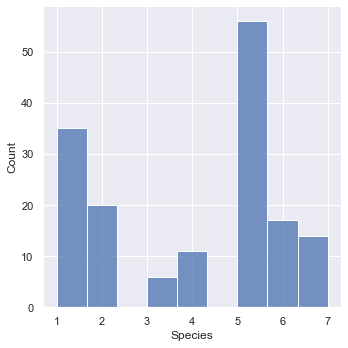

In [8]:
sns.displot(y)

# the PDF is an expression that defines a probability distribution (the likelihood of an outcome) of species type
# for the features

In [9]:
# species 1 and 5 are most common in the dataset

## Comparisons of each species by feature

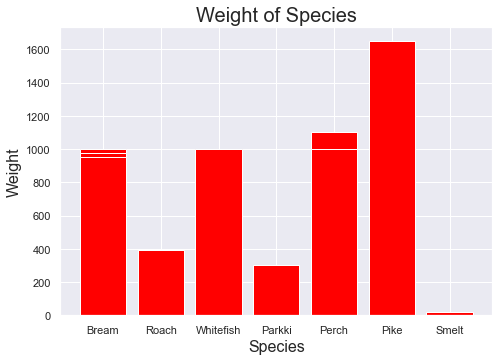

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
species = data['Species']
weight = data['Weight']
ax.bar(species, weight)
plt.bar(species, weight, color=['red'])
plt.ylabel('Weight', fontsize=16)
plt.xlabel('Species', fontsize =16)
plt.title('Weight of Species', fontsize= 20)
plt.show()

# we can see that Pike weigh the most
# Bream, Whitefish and Perch are of similar weights, clearly weigh less than Pike but much heavier than the rest.

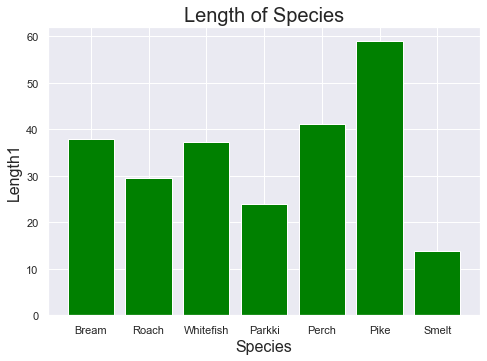

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
species = data['Species']
Length1 = data['Length1']
ax.bar(species, Length1)
plt.bar(species, Length1, color=['Green'])
plt.ylabel('Length1', fontsize = 16)
plt.xlabel('Species', fontsize = 16)
plt.title('Length of Species', fontsize= 20)
plt.show()

# As all charts for length1, 2 and 3 are extremely similar, I have only included Length1
# Pike are the longest, Perch, Whitefish and Bream are the next largest, followed by Roach, Parkki and finally Smelt

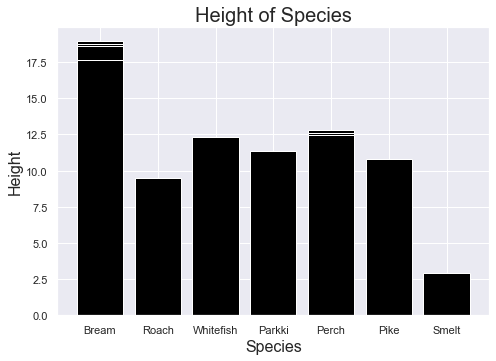

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
species = data['Species']
Height = data['Height']
ax.bar(species, Height)
plt.bar(species, Height, color=['Black'])
plt.ylabel('Height', fontsize =16)
plt.xlabel('Species', fontsize =16)
plt.title('Height of Species', fontsize= 20)
plt.show()

# we can see that Bream are the tallest by far, the rest are clustered in the middle without much varience
# apart from Smelt which is much shorter

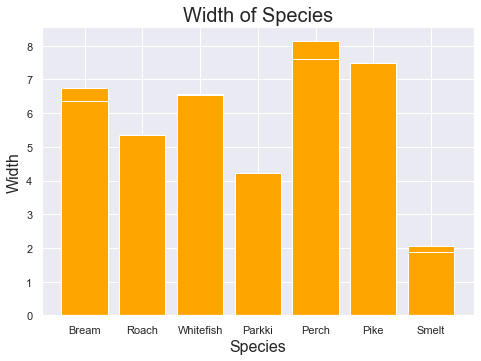

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
species = data['Species']
Width = data['Width']
ax.bar(species, Width)
plt.bar(species, Width, color=['Orange'])
plt.ylabel('Width', fontsize=16)
plt.xlabel('Species', fontsize=16)
plt.title('Width of Species', fontsize= 20)
plt.show()

# we can see that Perch is the widest, followed closely by Pike, which is in turn closely followed by Whitefish and Bream
# then Roach, Parkki and Smelt

## Standardising the variables so can be compared

In [14]:
from sklearn.preprocessing import StandardScaler

# this module imports a scaler to standardise the data, making the features comparable with each other

In [15]:
scaler = StandardScaler()

# applying the scaler to a new variable

In [16]:
scaler.fit(x)

# fitting the scaler to the data

StandardScaler()

In [17]:
x_scaled = scaler.transform(x)

# transforming the scaled data so it can fit together

In [18]:
x_scaled

array([[-4.38072172e-01, -3.05788578e-01, -2.82303007e-01,
        -1.06020232e-01,  5.96578670e-01, -2.36528948e-01],
       [-3.03562184e-01, -2.25507242e-01, -1.98053663e-01,
        -2.33668373e-03,  8.21260549e-01, -6.65789457e-02],
       [-1.63447613e-01, -2.35542409e-01, -1.79331587e-01,
        -1.09769794e-02,  7.97341291e-01,  1.65793169e-01],
       [-9.89949100e-02,  5.30159764e-03,  5.46943678e-02,
         1.96390116e-01,  8.79771455e-01,  2.26210031e-02],
       [ 8.87586153e-02,  2.53719316e-02,  5.46943678e-02,
         2.39591594e-01,  8.12834979e-01,  4.26371272e-01],
       [ 1.44804444e-01,  5.54774324e-02,  1.20221635e-01,
         3.00073664e-01,  1.08395111e+00,  3.03431249e-01],
       [ 2.84919015e-01,  5.54774324e-02,  1.20221635e-01,
         2.82793073e-01,  1.21901769e+00,  5.12357880e-01],
       [-2.33330416e-02,  1.35758768e-01,  1.48304750e-01,
         3.25994551e-01,  8.65728838e-01,  1.62163285e-01],
       [ 1.44804444e-01,  1.35758768e-01,  1.483

In [19]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Applying the Linear Regression model to the Data

In [20]:
reg = LinearRegression()
reg.fit(x_scaled,y)

# storing the regression model in a new variable (reg) and fitting it to the scaled data for each species

LinearRegression()

In [21]:
reg.coef_

# in output below, the numbers are the coefficients of the 6 features
# this is the constant that is multiplied by the variable

array([  0.85476284,   5.614399  ,   8.82652719, -14.37576717,
        -0.03693506,  -1.31416116])

In [22]:
reg.intercept_

# the intercept is the point where the function crosses the y axis (the predicted value for y when x is 0)

3.8805031446540883

In [23]:
reg.score(x_scaled,y)

# shows the model's accuracy in predicting species from the features (83%)
#.score() returns the R-Squared of a linear regression (simple or multiple)

# however, the Adjusted R-Squared is more appropriate for multiple linear regerssion
# as it adjusts for multiple variables

0.8352561425737633

In [24]:
x_scaled.shape

(159, 6)

### Formula for Adjusted R^2
$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$
###### n = 84 (number of observations) and p = 2 (the number of predictors)

##### R-Squared is the universal measure for evaluating how well linear regressions perform

### Calculating the R-Squared

In [25]:
r2 = reg.score(x_scaled,y)
# variable storing the R-Squared value

n = x.shape[0]
# the number of observations

p = x.shape[1]
# the number of predictors (6)

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2
# plugging in the variables into the R-Squared formula

0.8287530955700961

#### We can conclude that the Adjusted R Squared (82.8%) is significantly lower than R Squared (83.5%)
#### Therefore one or more of the predictors has little to no explanatory power
#### To find out which predictor is the least important we use feature selection:

## Feature Selection - which features are useful/useless

In [26]:
from sklearn.feature_selection import f_regression

# importing feature_selection module from sklearn library
# f_regression creates simple linear regressions of each feature (x_scaled) and the dependant variable (Species)

In [27]:
f_regression(x_scaled,y)

# applying the f_regression model to the data

(array([  5.06491515,   1.62375473,   2.23314555,   7.20627896,
        148.30843301,  17.32301142]),
 array([2.58037135e-02, 2.04451965e-01, 1.37085757e-01, 8.04482266e-03,
        1.92028875e-24, 5.18160895e-05]))

In [28]:
# first array shows F-statistics for each of the regressions
# Second array shows the corresponding P-values

In [29]:
p_values = f_regression(x_scaled,y)[1]
p_values

# storing the p-values from the regression in the variable 'p_values'

array([2.58037135e-02, 2.04451965e-01, 1.37085757e-01, 8.04482266e-03,
       1.92028875e-24, 5.18160895e-05])

In [30]:
p_values.round(3)

# as the output is written in scientific notation, the p_values will be rounded to 3 digits

array([0.026, 0.204, 0.137, 0.008, 0.   , 0.   ])

In [31]:
# as these p-values don't mean much without their corresponding feature lets get them into a table matching them to each feature

## Summary Table with P-values

In [36]:
reg_summary = pd.DataFrame(data = x.columns.values, columns=['Features'])
reg_summary

# creating a table with the features

,Features
0,Weight
1,Length1
2,Length2
3,Length3
4,Height
5,Width


In [33]:
reg_summary ['Coefficients'] = reg.coef_
reg_summary ['P-values'] = p_values.round(3)

# provides the table with the coefficient and p-values of the features

In [34]:
reg_summary

# displaying the table

,Features,Coefficients,P-values
0,Weight,0.854763,0.026
1,Length1,5.614399,0.204
2,Length2,8.826527,0.137
3,Length3,-14.375767,0.008
4,Height,-0.036935,0.000
5,Width,-1.314161,0.000


##### Variables with P-values higher than 0.05 (5%)are reduntant
##### Variables with P-values below 0.05 (5%)are useful



### Length1 (20.4%) and Length2 (13.7%) are redundant variables
### Weight (2.6%) and Length3 (0.8%) are certainly significant
### However, we can see that Height and Width (both rounded to 0%) are the most significant variables for predicting the fish species